# Exploratory Data Analysis - Pitchfork Reviews

### 📌 1. Importar librerías

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

### 📌 2. Cargar las variables de entorno

In [2]:
load_dotenv()

DATABASE_URL = os.getenv('DATABASE_URL')

### 📌 3. Cargar datos desde PostgreSQL

In [3]:
engine = create_engine(DATABASE_URL)
query = 'SELECT * FROM pitchfork_reviews;'
df = pd.read_sql(query, engine)

### 📌 4. Verificación de los primeros registros

In [4]:
df.head()

,id,title,artist,release_year,rating,genre,label,reviewer,review_text,url
0,1,MUSIC,Playboi Carti,2025,7.7,Rap,AWGE / Interscope,Alphonse Pierre,Carti’s long-awaited third official album is a...,https://pitchfork.com/reviews/albums/playboi-c...
1,2,two house,"food house, Gupi, Fraxiom",2025,7.0,Electronic,self-released,Colin Joyce,The post-hyperpop pranksters’ second album is ...,https://pitchfork.com/reviews/albums/food-hous...
2,3,BLACK’!ANTIQUE,Pink Siifu,2025,7.1,Rap,Dynamite Hill,Matthew Ritchie,The rapper’s third solo LP is a community affa...,https://pitchfork.com/reviews/albums/pink-siif...
3,4,So Wavy Luciano,Bloody!,2025,7.2,Rap,self-released,Jude Noel,The New York City rapper pushes hedonism to th...,https://pitchfork.com/reviews/albums/bloody-so...
4,5,Consentrik Quartet,Nels Cline,2025,7.3,Experimental / Jazz,Blue Note,Grayson Haver Currin,In a new quartet of seasoned New York improvis...,https://pitchfork.com/reviews/albums/nels-clin...


### 📌 5. Limpieza de datos

In [5]:
# Registros con valores nulos
print(df.isnull().sum())

print(df[df['artist'].isnull()][['title', 'url']])

print(df[df['title'].isnull()])

#df.dropna(inplace=True)

id               0
title            1
artist          43
release_year     7
rating           0
genre           74
label           21
reviewer         0
review_text      1
url              0
dtype: int64
                                                  title  \
80                                                 None   
303   Even the Forest Hums: Ukrainian Sonic Archives...   
421                                     Soundbombing II   
464             Kampire Presents: A Dancefloor in Ndola   
623             I Saw the TV Glow (Original Soundtrack)   
714                             funk​.​BR - S​ã​o Paulo   
901                                          Weavings 2   
927                              Tokyo Riddim 1976-1985   
956                                Synthetic Bird Music   
1090  The NID Tapes: Electronic Music From India 196...   
1296                                   Barbie the Album   
1644  Blacklips Bar: Androgyns and Deviants - Indust...   
1670       Soul’d Out: The Com

### 📌 6. Análisis descriptivo

In [6]:
df.describe()

,id,rating
count,3779.000000,3779.000000
mean,1890.000000,7.366208
std,1091.047662,0.818661
min,1.000000,2.000000
25%,945.500000,7.000000
50%,1890.000000,7.400000
75%,2834.500000,7.800000
max,3779.000000,10.000000


## 📌 7. Visualización de la distribución de puntuaciones

Index(['id', 'title', 'artist', 'release_year', 'rating', 'genre', 'label',
       'reviewer', 'review_text', 'url'],
      dtype='object')


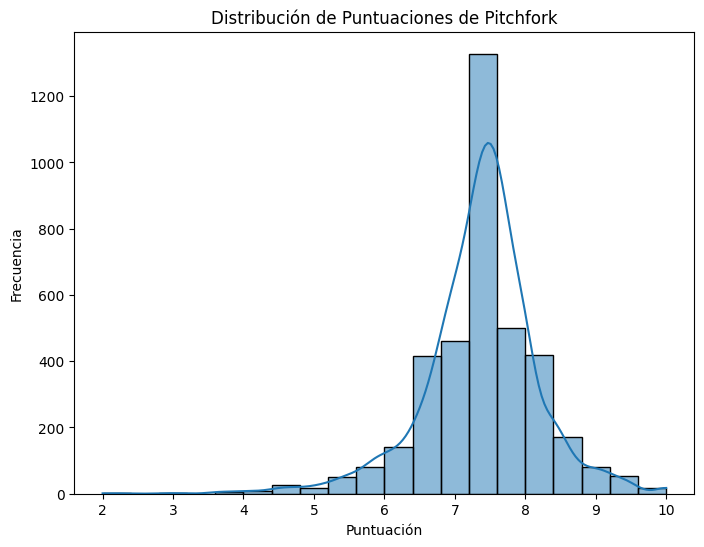

In [7]:
# Verifica que la columna 'rating' exista y sea numérica
print(df.columns)  # Asegúrate de que 'rating' esté en las columnas

# Elimina filas con NaN en 'rating'
df = df.dropna(subset=['rating'])

# Convierte 'rating' a numérico si es necesario
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Crear el gráfico
plt.figure(figsize=(8, 6))
sns.histplot(df['rating'], kde=True, bins=20)
plt.title('Distribución de Puntuaciones de Pitchfork')
plt.xlabel('Puntuación')
plt.ylabel('Frecuencia')
plt.show()

### 📌 8. Visualización de los géneros musicales

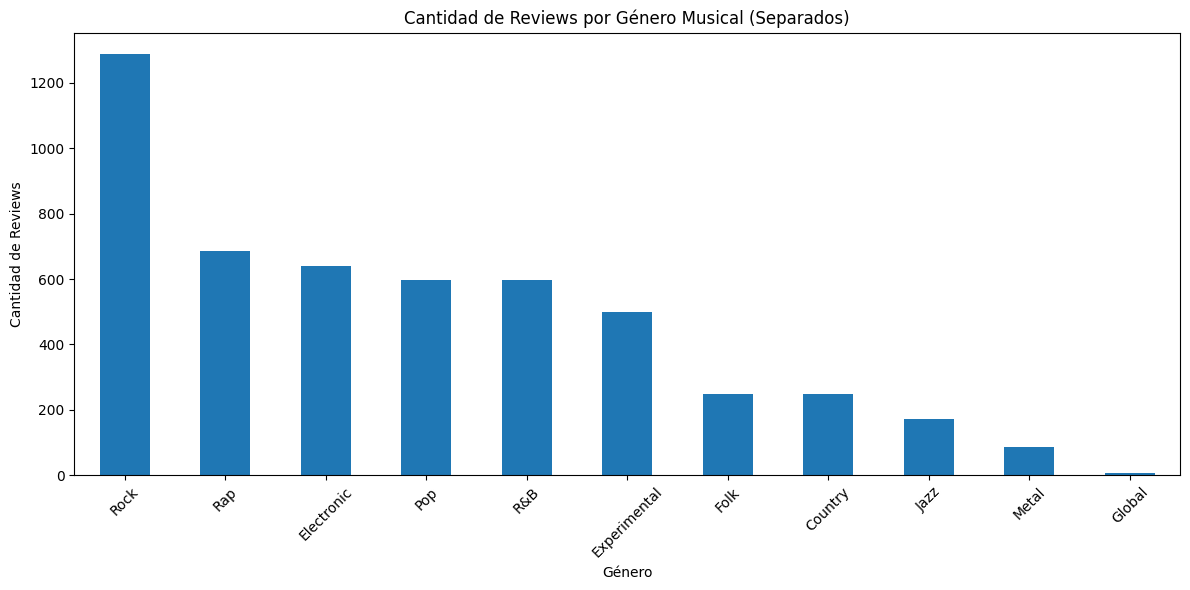

In [8]:
# Paso 1: Separamos los géneros
all_genres = df['genre'].dropna().str.split(r'\s*/\s*')

# Paso 2: Aplanamos la lista de listas y la convertimos en una sola Serie
genres_series = pd.Series([genre for sublist in all_genres for genre in sublist])

# Paso 3: Contamos cada género
genre_count = genres_series.value_counts()

# Paso 4: Plot
plt.figure(figsize=(12,6))
genre_count.plot(kind='bar')
plt.title('Cantidad de Reviews por Género Musical (Separados)')
plt.xlabel('Género')
plt.ylabel('Cantidad de Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()